## Importing necessary libraries and data

In [1]:
# Make the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

sns.set_style("darkgrid")

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check for homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to check for normality
import scipy.stats as stats

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("used_phone_data.csv")  # import data into DataFrame df

# prints the number of rows and columns in the data
print(
    "There are ",
    df.shape[0],
    " rows in the data frame",
    "\n",
    "There are ",
    df.shape[1],
    " columns in the data frame",
)
df.head()

There are  3571  rows in the data frame 
 There are  15  columns in the data frame


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

In [4]:
# displays the null values for their repective columns
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

### Observations:
1. There are alot of null values in main_camera_mp. There are a small amount of null values in selfie_camera_mp, int_memory, ram, battery, and weight.
2. All values are numerical except brand_name, os, 4g, and 5g. Must make these values from object to categorical.

In [5]:
# this will take all the numerical columns and fill all null values
# with the mean value of each column

# numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()), axis=0)

df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [6]:
# displays the null values for their repective columns
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

### Observations:
- The null values have been changed into their respective columns mean values.

In [7]:
# summary of data with columns names of data in the rows and summary data in the columns
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3368,33,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3368,4,Android,3056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3368.0,NaN,NaN,NaN,14.575095,5.045491,2.7,11.43,13.49,16.03,46.36
4g,3368,2,yes,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3368,2,no,3283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3368.0,NaN,NaN,NaN,9.419519,4.803271,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3368.0,NaN,NaN,NaN,6.096437,6.513867,0.3,2.0,5.0,8.0,32.0
int_memory,3368.0,NaN,NaN,NaN,52.056596,85.108736,0.005,16.0,32.0,64.0,1024.0
ram,3368.0,NaN,NaN,NaN,3.98095,1.271313,0.03,4.0,4.0,4.0,16.0
battery,3368.0,NaN,NaN,NaN,3008.418795,1361.468949,80.0,2050.0,3000.0,3900.0,12000.0


<IPython.core.display.Javascript object>

In [8]:
# count of different operating systems
df.os.value_counts()

Android    3056
Others      191
Windows      65
iOS          56
Name: os, dtype: int64

<IPython.core.display.Javascript object>

### Observations:
1. It seems that there may be outliers in used_price, battery, weight, new_price, and int_memory.
2. 4g and 5g are just yes or no answers.
3. os has four answers, Android, Windows,iOS, or Others.
4. Average price for a used phone: ~€109
5. The used_price standard deviation seems too large compared to its mean

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [9]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

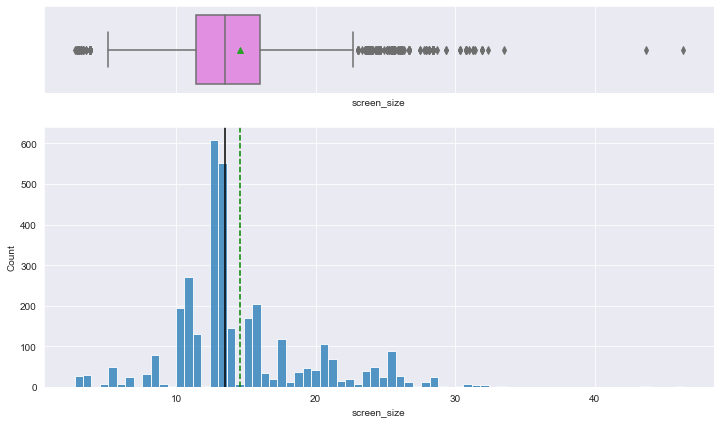

<IPython.core.display.Javascript object>

In [10]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="screen_size")
plt.savefig("hist_box_screen_size.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The screen sizes are slightly right skewed meaning the information has more large screens than small screens.
+ The mean is ~15 cm.
+ The data contains to very large outliers.

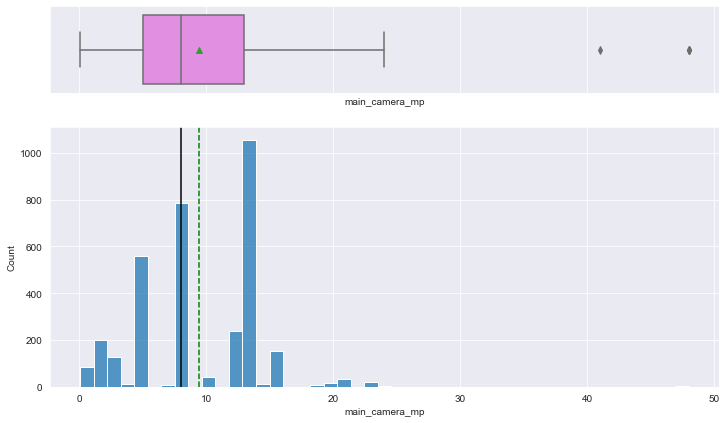

<IPython.core.display.Javascript object>

In [11]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="main_camera_mp")
plt.savefig("hist_box_main_camera_mp.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The main camera resolutions are slightly right skewed meaning the information has greater amount of large megapixels than smaller amounts.
+ The mean is ~9.5 megapixels.
+ The data contains two very large outliers.

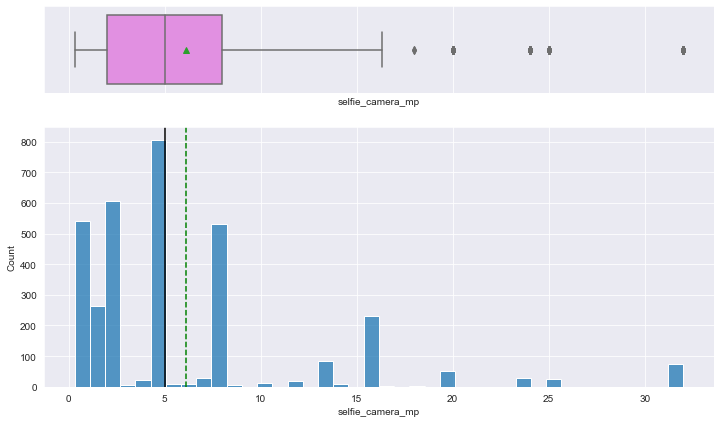

<IPython.core.display.Javascript object>

In [12]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="selfie_camera_mp")
plt.savefig("hist_box_selfie_camera_mp.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The selfie camera resolutions are slightly right skewed meaning the information has greater amount of large megapixels than smaller amounts.
+ The mean is ~6.5 megapixels.
+ The data contains a few large outliers.

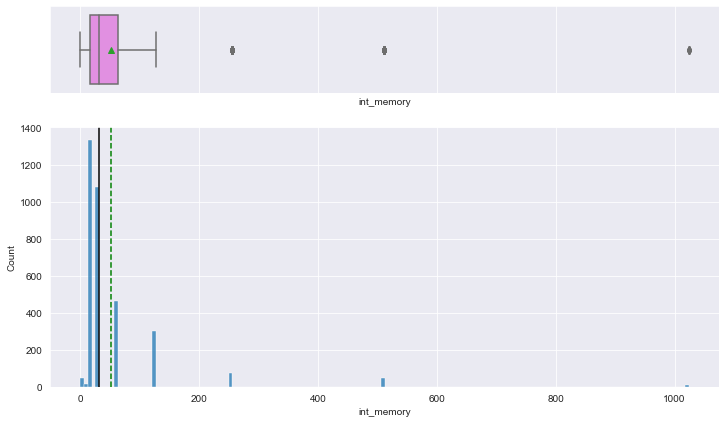

<IPython.core.display.Javascript object>

In [13]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="int_memory")
plt.savefig("hist_box_int_memory.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The internal memory is heavily right skewed meaning the information has far more phones with large amounts of ROM than small amounts.
+ The mean is ~60 GB.
+ The data has one very large outlier and two other large outliers.

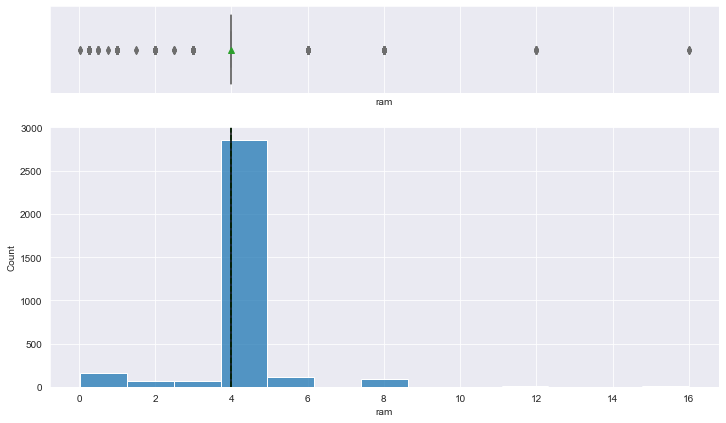

<IPython.core.display.Javascript object>

In [14]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="ram")
plt.savefig("hist_box_ram.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The RAM is slightly right skewed meaning the information has far more phones with large amounts of RAM than small amounts.
+ The mean is ~4 GB.
+ The data is riddled with outliers causing the boxplot to be completely distorted and not even demenstrating any quartiles or means.

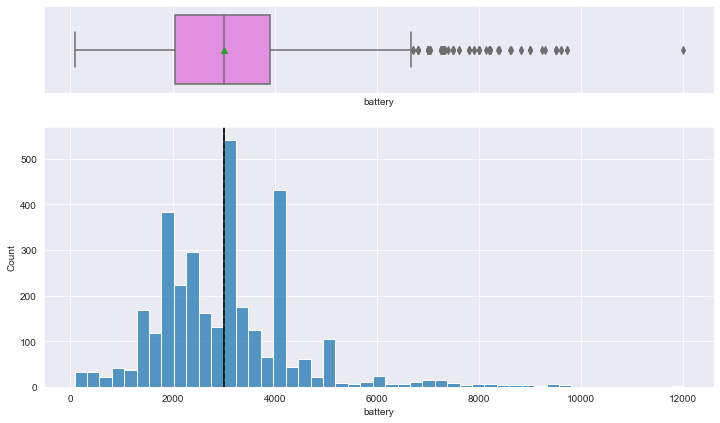

<IPython.core.display.Javascript object>

In [15]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="battery")
plt.savefig("hist_box_battery.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The battery is slightly right skewed meaning the information has far more phones with large batteries small batteries.
+ The mean is ~3000mAh.
+ The data has large outliers.

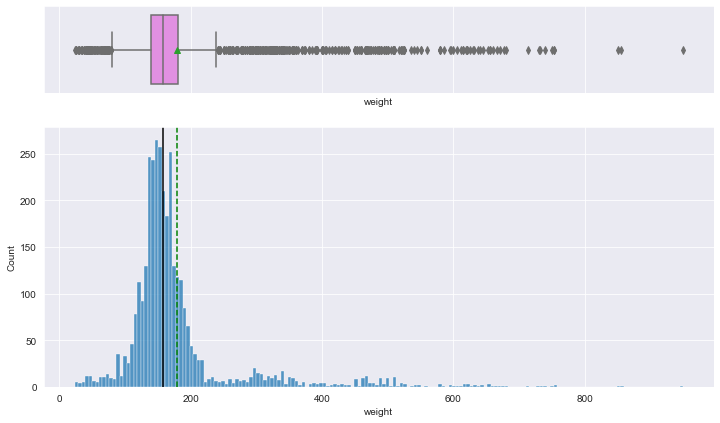

<IPython.core.display.Javascript object>

In [16]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="weight")
plt.savefig("hist_box_weight.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The weight is heavily right skewed.
+ The mean is ~175g.
+ The data has many outliers.

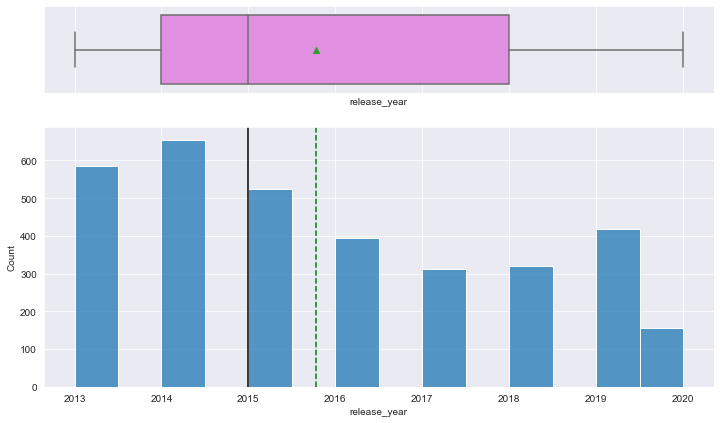

<IPython.core.display.Javascript object>

In [17]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="release_year")
plt.savefig("hist_box_release_year.jpg", bbox_inches="tight")  # saves plot as JPEG

+ The data has no outliers.
+ The data could be changed to a date time or categorical type, since it only has 8 unique values.
+ The mean and median value is 2016.

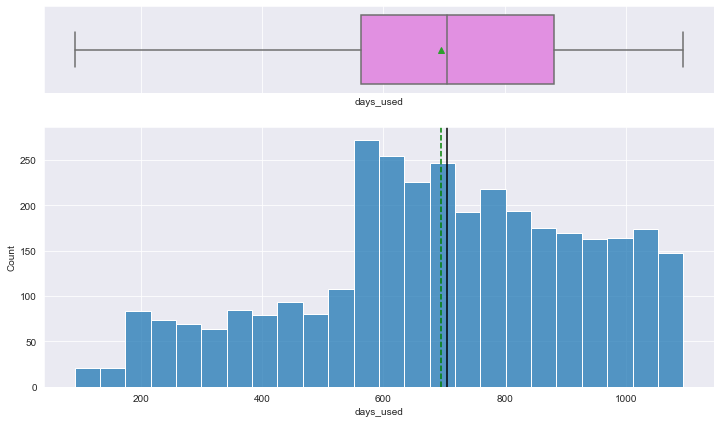

<IPython.core.display.Javascript object>

In [18]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="days_used")
plt.savefig("hist_box_days_used.jpg", bbox_inches="tight")  # saves plot as JPEG

+ Left skewed data.
+ No outliers
+ Mean ~700 days.

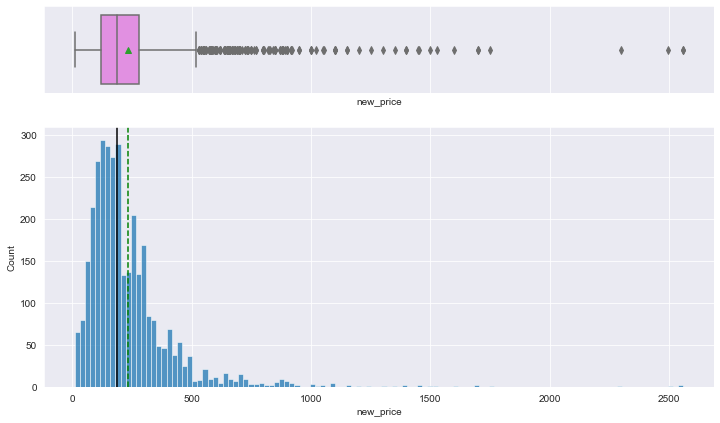

<IPython.core.display.Javascript object>

In [19]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="new_price")
plt.savefig("hist_box_new_price.jpg", bbox_inches="tight")  # saves plot as JPEG

+ Right skewed data.
+ Many large outliers.
+ Mean ~€250

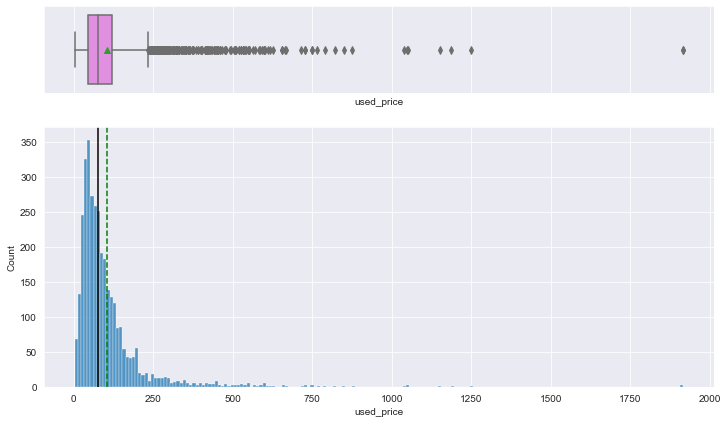

<IPython.core.display.Javascript object>

In [20]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="used_price")
plt.savefig("hist_box_used_price.jpg", bbox_inches="tight")  # saves plot as JPEG

+ Heavily right skewed.
+ Many large outliers
+ Mean ~€125

In [21]:
# function to create labeled barplots
def labeled_countplot(data, feature, perc=False, figsize=(15, 7)):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()  # counts amount of unique values for
    plt.figure(figsize=figsize)  # sets figure size

    plt.xticks(rotation=90, fontsize=15)  # rotates tick labels 90 degrees
    #     create countplot
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="BuPu",  # sets color for plot
        order=data[feature]
        .value_counts()
        .sort_values(ascending=False)
        .index[:None],  # sets order of bars for plot in descending order
    )
    #     creates labels on top of bars that are either counts or perentages of the whole column depending perc value
    for p in ax.patches:
        if (
            perc == True
        ):  # if perc is True labels are percentages, if False teh labels are counts
            label = "{:0d}%".format(
                int(100 * p.get_height() / total)
            )  # percentage of each class of the category
        else:
            label = int(p.get_height())  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        #         edits the labels to be the correct size and placement
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage or the count

<IPython.core.display.Javascript object>

## Used phones that are Andriod

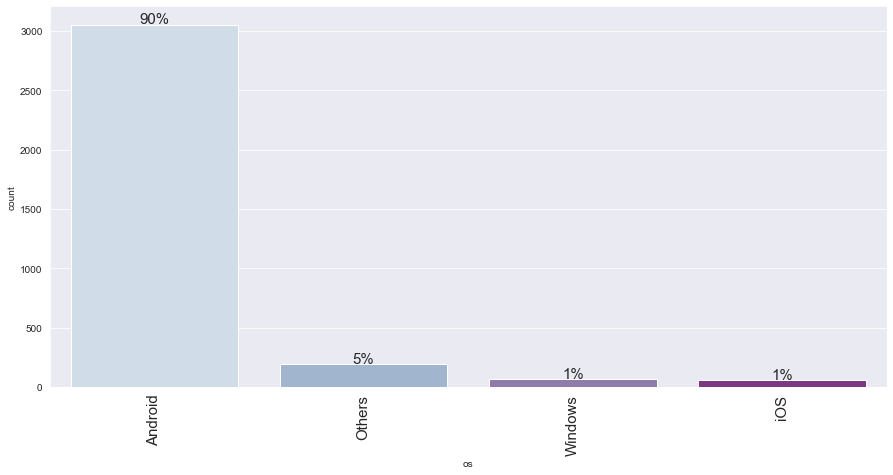

<IPython.core.display.Javascript object>

In [22]:
# plots data with labels of percentage
labeled_countplot(data=df, feature="os", perc=True)
plt.savefig("phone_percentage_by_OS.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

### Observations:
+ Andriod devices make up of 90% of the market of used phones.

In [23]:
# shows mean values of data column from a particular group of data
df.groupby("os").used_price.mean().sort_values(ascending=False)

os
iOS        280.759286
Android    104.951044
Windows     64.999385
Others      45.216597
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [24]:
# shows mean values of data column from a particular group of data
df.groupby("os").new_price.mean().sort_values(ascending=False)

os
iOS        634.888598
Android    234.150933
Windows    190.371077
Others      99.681997
Name: new_price, dtype: float64

<IPython.core.display.Javascript object>

In [25]:
# shows mean values of data column from a particular group of data
df.groupby("brand_name").used_price.mean().sort_values(ascending=False)[:10]

brand_name
Apple      293.228814
Google     206.422308
Huawei     176.256894
Vivo       156.784757
Oppo       150.587156
Honor      132.285932
Samsung    132.083462
Xiaomi     123.499273
LG         115.853726
OnePlus    104.578000
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [26]:
# shows mean values of data column from a particular group of data
df.groupby("brand_name").new_price.mean().sort_values(ascending=False)[:10]

brand_name
Apple      639.004941
Google     408.600000
OnePlus    331.980000
Huawei     323.960091
Oppo       317.009761
Vivo       316.331403
Samsung    293.854500
Sony       260.943210
Gionee     255.379286
Xiaomi     251.303264
Name: new_price, dtype: float64

<IPython.core.display.Javascript object>

In [27]:
# shows mean values of data column from a particular group of data
df.groupby("os").used_price.sum().sort_values(ascending=False)

os
Android    320730.39
iOS         15722.52
Others       8636.37
Windows      4224.96
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
# creates data frame that shows mean values of data column from a particular group of data
pd.DataFrame(
    df.groupby("os").used_price.sum().sort_values(ascending=False).reset_index()
)

,os,used_price
0,Android,320730.39
1,iOS,15722.52
2,Others,8636.37
3,Windows,4224.96


<IPython.core.display.Javascript object>

In [29]:
# shows top 5 rows of data frame made of just two columns of data
df[["os", "used_price"]].head()

,os,used_price
0,Android,86.96
1,Android,161.49
2,Android,268.55
3,Android,180.23
4,Android,103.80


<IPython.core.display.Javascript object>

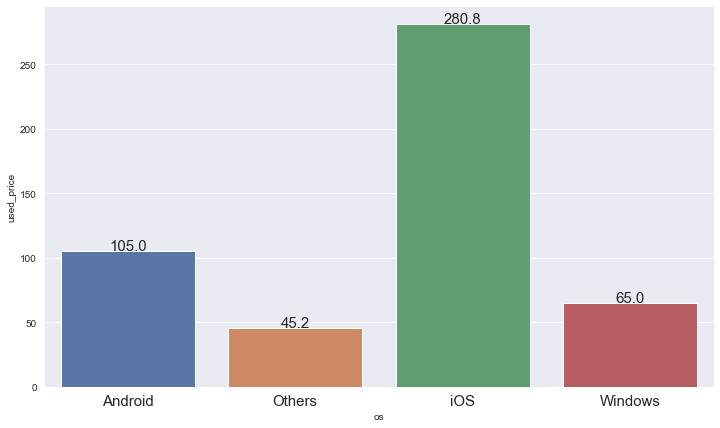

<IPython.core.display.Javascript object>

In [30]:
# plot of data frame made of just just the os and mean used price data

total = len(df["os"])  # length of the column
count = df["os"].nunique()  # counts amount of unique values for
plt.figure(figsize=(12, 7))  # sets figure size

plt.xticks(fontsize=15)  # rotates tick labels 90 degrees
#     create countplot
ax = sns.barplot(
    data=df[["os", "used_price"]],
    x="os",
    y="used_price",
    palette="deep",  # sets color for plot
    ci=None,
)
#     creates labels on top of bars that are either counts or perentages of the whole column depending perc value
for p in ax.patches:
    label = round(p.get_height(), 1)  # count of each level of the category

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot

    #         edits the labels to be the correct size and placement
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=15,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage or the count

plt.savefig("used_price_per_OS.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()  # show the plot

### Observations:
+ iOS is the most epxensive operating system.
+ Most of the top brand names are from Andriod, which leads to Android having the largest amount of phones as well as the highest total prices.

## RAM per brand

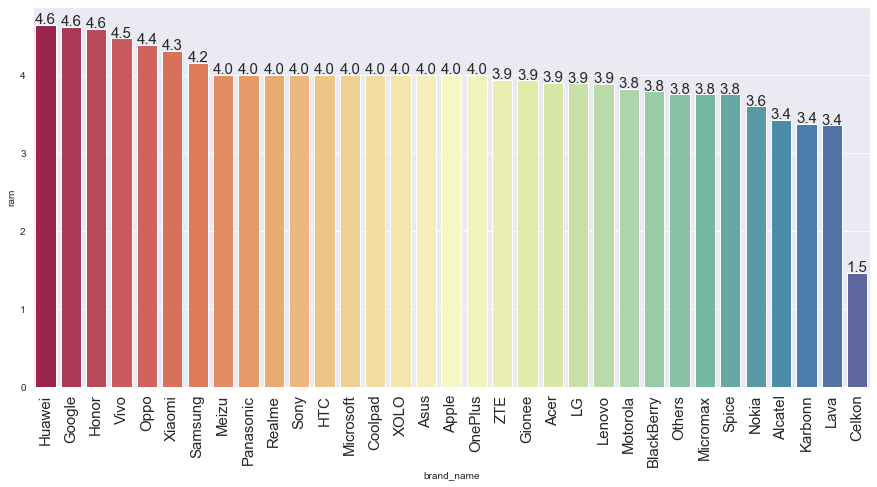

<IPython.core.display.Javascript object>

In [31]:
# plot of data frame made of just just the os and mean used price data

total = len(df["brand_name"])  # length of the column
count = df["brand_name"].nunique()  # counts amount of unique values for
plt.figure(figsize=(15, 7))  # sets figure size

plt.xticks(rotation=90, fontsize=15)  # rotates tick labels 90 degrees
#     create countplot
ax = sns.barplot(
    data=df,
    x="brand_name",
    y="ram",
    palette="Spectral",  # sets color for plot
    ci=None,
    order=df.groupby("brand_name")  # set order as descending order
    .ram.mean()
    .sort_values(ascending=False)
    .reset_index()["brand_name"],
)
#     creates labels on top of bars that are either counts or perentages of the whole column depending perc value
for p in ax.patches:
    label = round(p.get_height(), 1)  # count of each level of the category

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot

    #         edits the labels to be the correct size and placement
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=15,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage or the count

plt.savefig("ram_per_brand.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()  # show the plot

In [32]:
# list of mean values of ram grouped by brand name in descending order
df.groupby("brand_name").ram.mean().sort_values(ascending=False)

brand_name
Huawei        4.641326
Google        4.615385
Honor         4.593220
Vivo          4.470874
Oppo          4.385321
Xiaomi        4.309091
Samsung       4.159341
Meizu         4.000000
Panasonic     4.000000
Realme        4.000000
Sony          4.000000
HTC           4.000000
Microsoft     4.000000
Coolpad       4.000000
XOLO          4.000000
Asus          4.000000
Apple         4.000000
OnePlus       4.000000
ZTE           3.936131
Gionee        3.933036
Acer          3.901961
LG            3.893868
Lenovo        3.886628
Motorola      3.826087
BlackBerry    3.791667
Others        3.751041
Micromax      3.750000
Spice         3.750000
Nokia         3.601351
Alcatel       3.426000
Karbonn       3.375000
Lava          3.352941
Celkon        1.466216
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

In [33]:
# list of mean values of used price grouped by brand name in descending order
df.groupby("brand_name").used_price.mean().sort_values(ascending=False)

brand_name
Apple         293.228814
Google        206.422308
Huawei        176.256894
Vivo          156.784757
Oppo          150.587156
Honor         132.285932
Samsung       132.083462
Xiaomi        123.499273
LG            115.853726
OnePlus       104.578000
HTC            99.626000
Sony           99.555556
Asus           94.062213
Meizu          93.805455
Gionee         91.881964
Motorola       88.336087
ZTE            86.081533
BlackBerry     83.033333
Others         78.492102
Lenovo         77.147500
Coolpad        67.935789
Realme         66.348000
Acer           63.798431
Nokia          63.505045
Panasonic      57.668667
Alcatel        55.326080
Microsoft      53.213333
XOLO           48.848095
Lava           39.424118
Micromax       38.134417
Karbonn        38.069333
Spice          32.299667
Celkon         22.648378
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [34]:
# list of mean values of new price grouped by brand name in descending order
df.groupby("brand_name").new_price.mean().sort_values(ascending=False)

brand_name
Apple         639.004941
Google        408.600000
OnePlus       331.980000
Huawei        323.960091
Oppo          317.009761
Vivo          316.331403
Samsung       293.854500
Sony          260.943210
Gionee        255.379286
Xiaomi        251.303264
HTC           249.853818
LG            242.218203
Meizu         240.035227
Asus          239.327004
Honor         235.897915
ZTE           209.181460
BlackBerry    204.589444
Motorola      195.497989
Lenovo        193.358779
Others        191.112094
Coolpad       189.654211
Acer          172.867647
Panasonic     166.857111
Microsoft     158.517143
Alcatel       142.499092
Nokia         138.888532
Realme        137.888000
XOLO          134.247619
Karbonn       110.384333
Lava          109.042059
Micromax      106.964667
Spice          98.000000
Celkon         60.956486
Name: new_price, dtype: float64

<IPython.core.display.Javascript object>

### Observation:
+ Oneplus has the most RAM by far. It is also the most expensive used phone and the second most expensive new phone. Oppo and Vivo are the more cost effective versions for good RAM. Price seems to be correlated with RAM.

## Weight vs large batteries

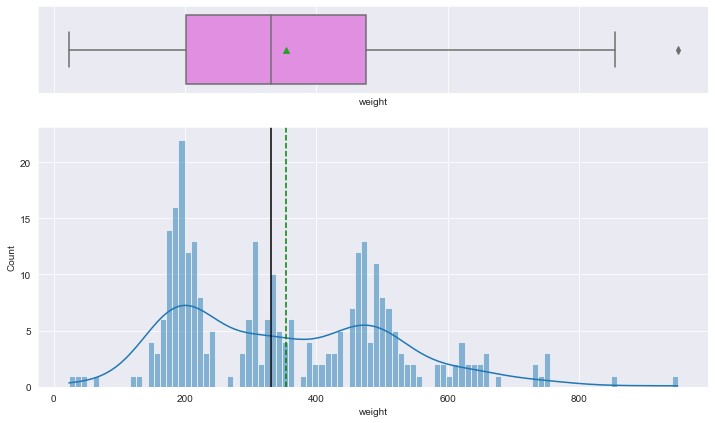

<IPython.core.display.Javascript object>

In [35]:
# creates data frame for bettery capacity over 4500 mAh
df_large_battery = df[df["battery"] > 4500]
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df_large_battery, feature="weight", kde=True, bins=100)
plt.savefig(
    "distribution_of_weight_of_phones_with_battery_greater_than_4500.jpg",
    bbox_inches="tight",
)  # saves plot as JPEG
plt.show()

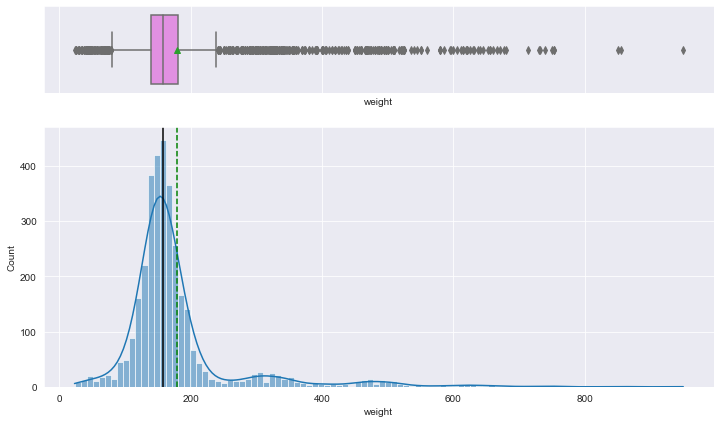

<IPython.core.display.Javascript object>

In [36]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="weight", kde=True, bins=100)
plt.savefig("weight_distribution.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

### Observation:
+ The subset of only large batteries has only one outlier as opposed to the weight with all the batterry sizes has many outliers. The curve has flattened out as more of the smaller weights have been removed. Thus the larger the battery the heavier the phone. The mean and median have also increased. Overall the data seems more spread out with batteries over 4500 mAh.

## Screen larger than 6 inches across brands.

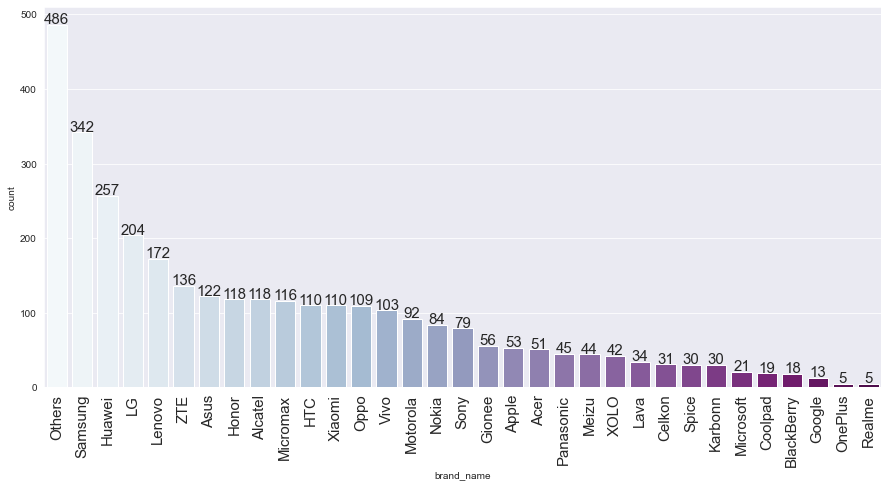

<IPython.core.display.Javascript object>

In [37]:
# create data frame with screen sizes greater than 6 cm
df_screen_size_larger_6 = df[df.screen_size > 6]
# plots data with labels of counts
labeled_countplot(data=df_screen_size_larger_6, feature="brand_name", perc=False)
plt.savefig(
    "screen_larger_than_6_per_brand.jpg", bbox_inches="tight"
)  # saves plot as JPEG
plt.show()

In [38]:
# create list of counted brands that have screen sizes greater than 6 cm
df_screen_size_larger_6.brand_name.value_counts()

Others        486
Samsung       342
Huawei        257
LG            204
Lenovo        172
ZTE           136
Asus          122
Honor         118
Alcatel       118
Micromax      116
HTC           110
Xiaomi        110
Oppo          109
Vivo          103
Motorola       92
Nokia          84
Sony           79
Gionee         56
Apple          53
Acer           51
Panasonic      45
Meizu          44
XOLO           42
Lava           34
Celkon         31
Spice          30
Karbonn        30
Microsoft      21
Coolpad        19
BlackBerry     18
Google         13
OnePlus         5
Realme          5
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

### Observation:
+ Others and Samsung have the most large sized screens. Since other is a mesh of multiple brands there are not a reliable source of brand data. It seems that the top brands with large screens are based in Asia. Maybe those areas are more entertainment based then other areas.

## Budget phones vs selfie camera greater than 8MP

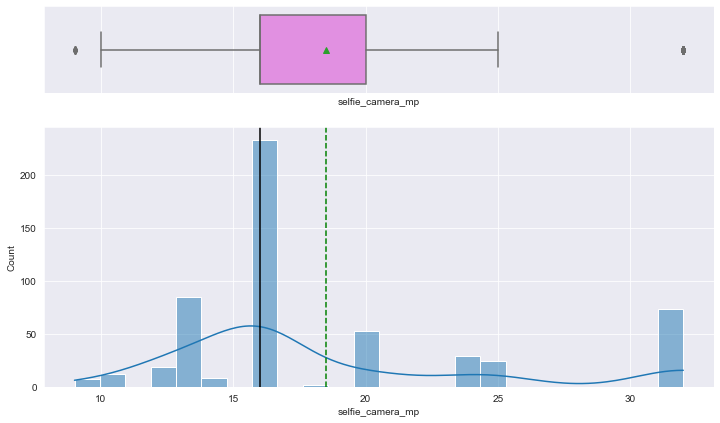

<IPython.core.display.Javascript object>

In [39]:
# create data frame with selfie camera resolution greater than 8 megapixels
df_selfie_cam_greater_8 = df[df.selfie_camera_mp > 8]
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df_selfie_cam_greater_8, feature="selfie_camera_mp", kde=True)
plt.savefig(
    "distribution_selfie_cam_greater_than_8MP.jpg", bbox_inches="tight"
)  # saves plot as JPEG
plt.show()

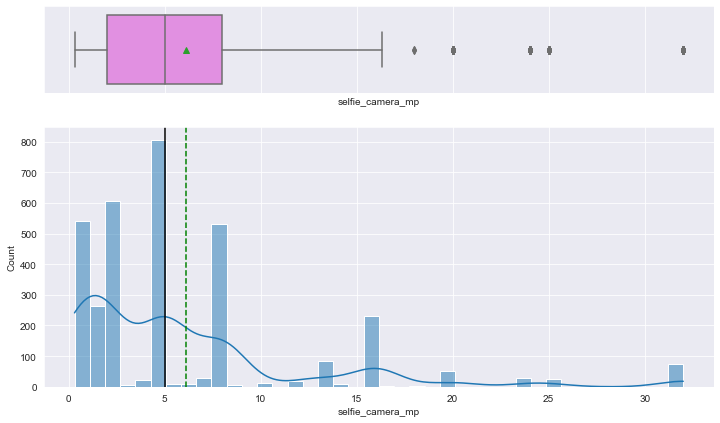

<IPython.core.display.Javascript object>

In [40]:
# shows subplot of a column of data's boxplot and histogram plot
histogram_boxplot(data=df, feature="selfie_camera_mp", kde=True)
plt.savefig("distribution_selfie_cam.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

In [41]:
# create list of counted selfie camera resolutions greater than 8 megapixels
df_selfie_cam_greater_8.selfie_camera_mp.value_counts()

16.0    232
13.0     85
32.0     73
20.0     53
24.0     29
25.0     24
12.0     19
10.0     10
9.0       7
14.5      5
14.0      3
18.0      2
10.5      2
16.3      1
Name: selfie_camera_mp, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
# prints percentage of phones that have a selfie camera greater than 8 megapixels
print(
    "{:.2f}%".format((df_selfie_cam_greater_8.shape[0] / df.shape[0]) * 100),
    "percent of phones have a selfie camera greater than 8 MP.",
)

16.18% percent of phones have a selfie camera greater than 8 MP.


<IPython.core.display.Javascript object>

### Observation:
+ The distribution changes drastically since we took out 81.35% of the data.
+ The distribution is now showing that almsot 50% of the phones with a selfie camera greater than 8MP are phones with 16MP.

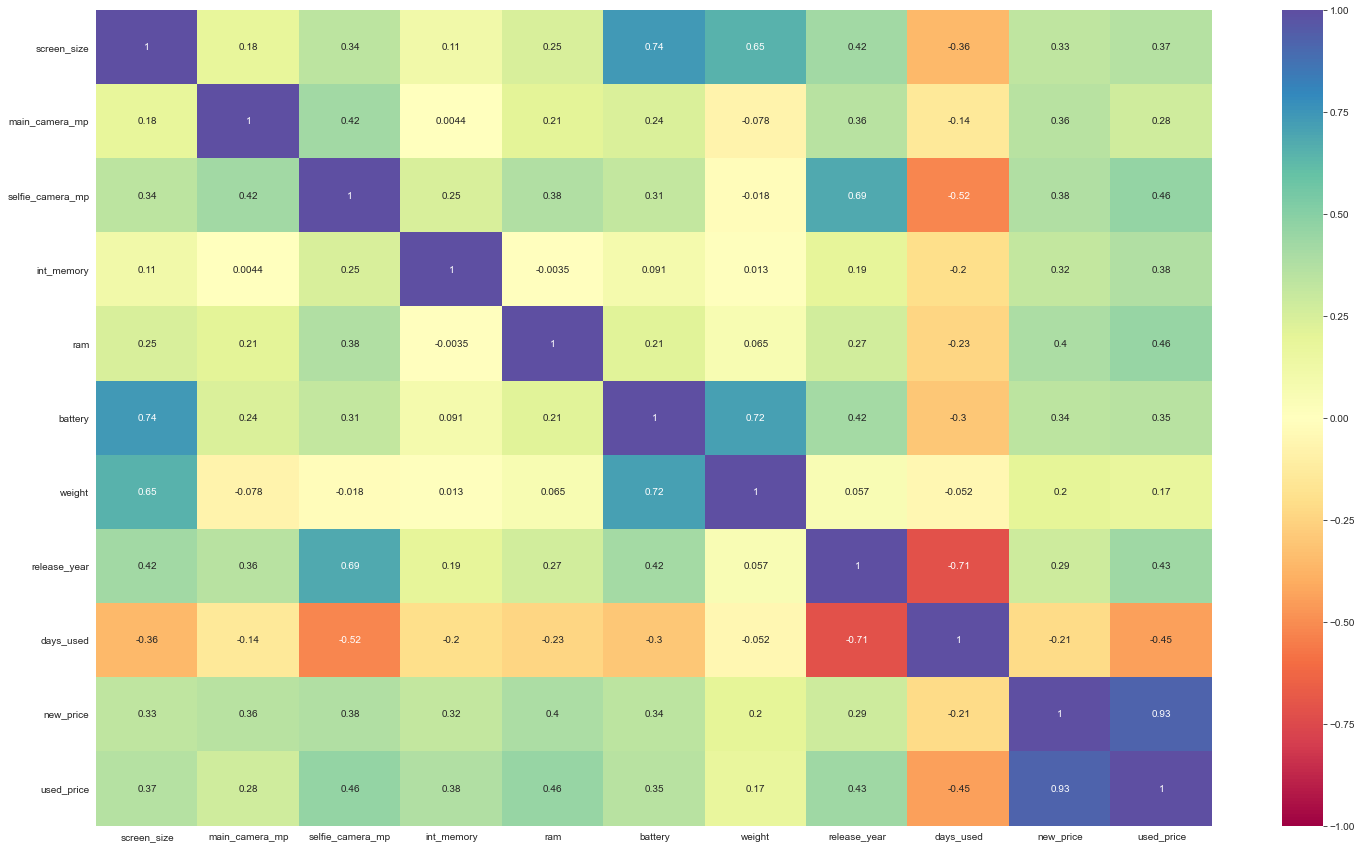

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(25, 15))
sns.heatmap(
    data=df.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral"
)  # shows heatmap of correlation
plt.savefig("heatmap.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

### Observation:
   - new_price and used_price are highly correlated. Meaning that if a phone is cheap or expensive new then it will be cheap or expnsive after it has been used.
   - release_year and days_used are fairly negative correlated.
   - weight and battery are fairly positively correlated. Meaning the larger the battery the heavier the phone.
   - screen_size and battery are failry positively correlated. Meaning the larger the screen the larger the battery.
   - release_year and selfie_camera_mp are fairly positively correlated. meaning the newer the phone the better the selfie camera.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [44]:
# creates list of all numeric column names
df_object_cols = df.select_dtypes(include="object").columns.tolist()

df[df_object_cols] = df[df_object_cols].astype(
    "category"
)  # turn all object type columns into category types
df.dtypes

brand_name          category
os                  category
screen_size          float64
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
dtype: object

<IPython.core.display.Javascript object>

## Feature Engineering

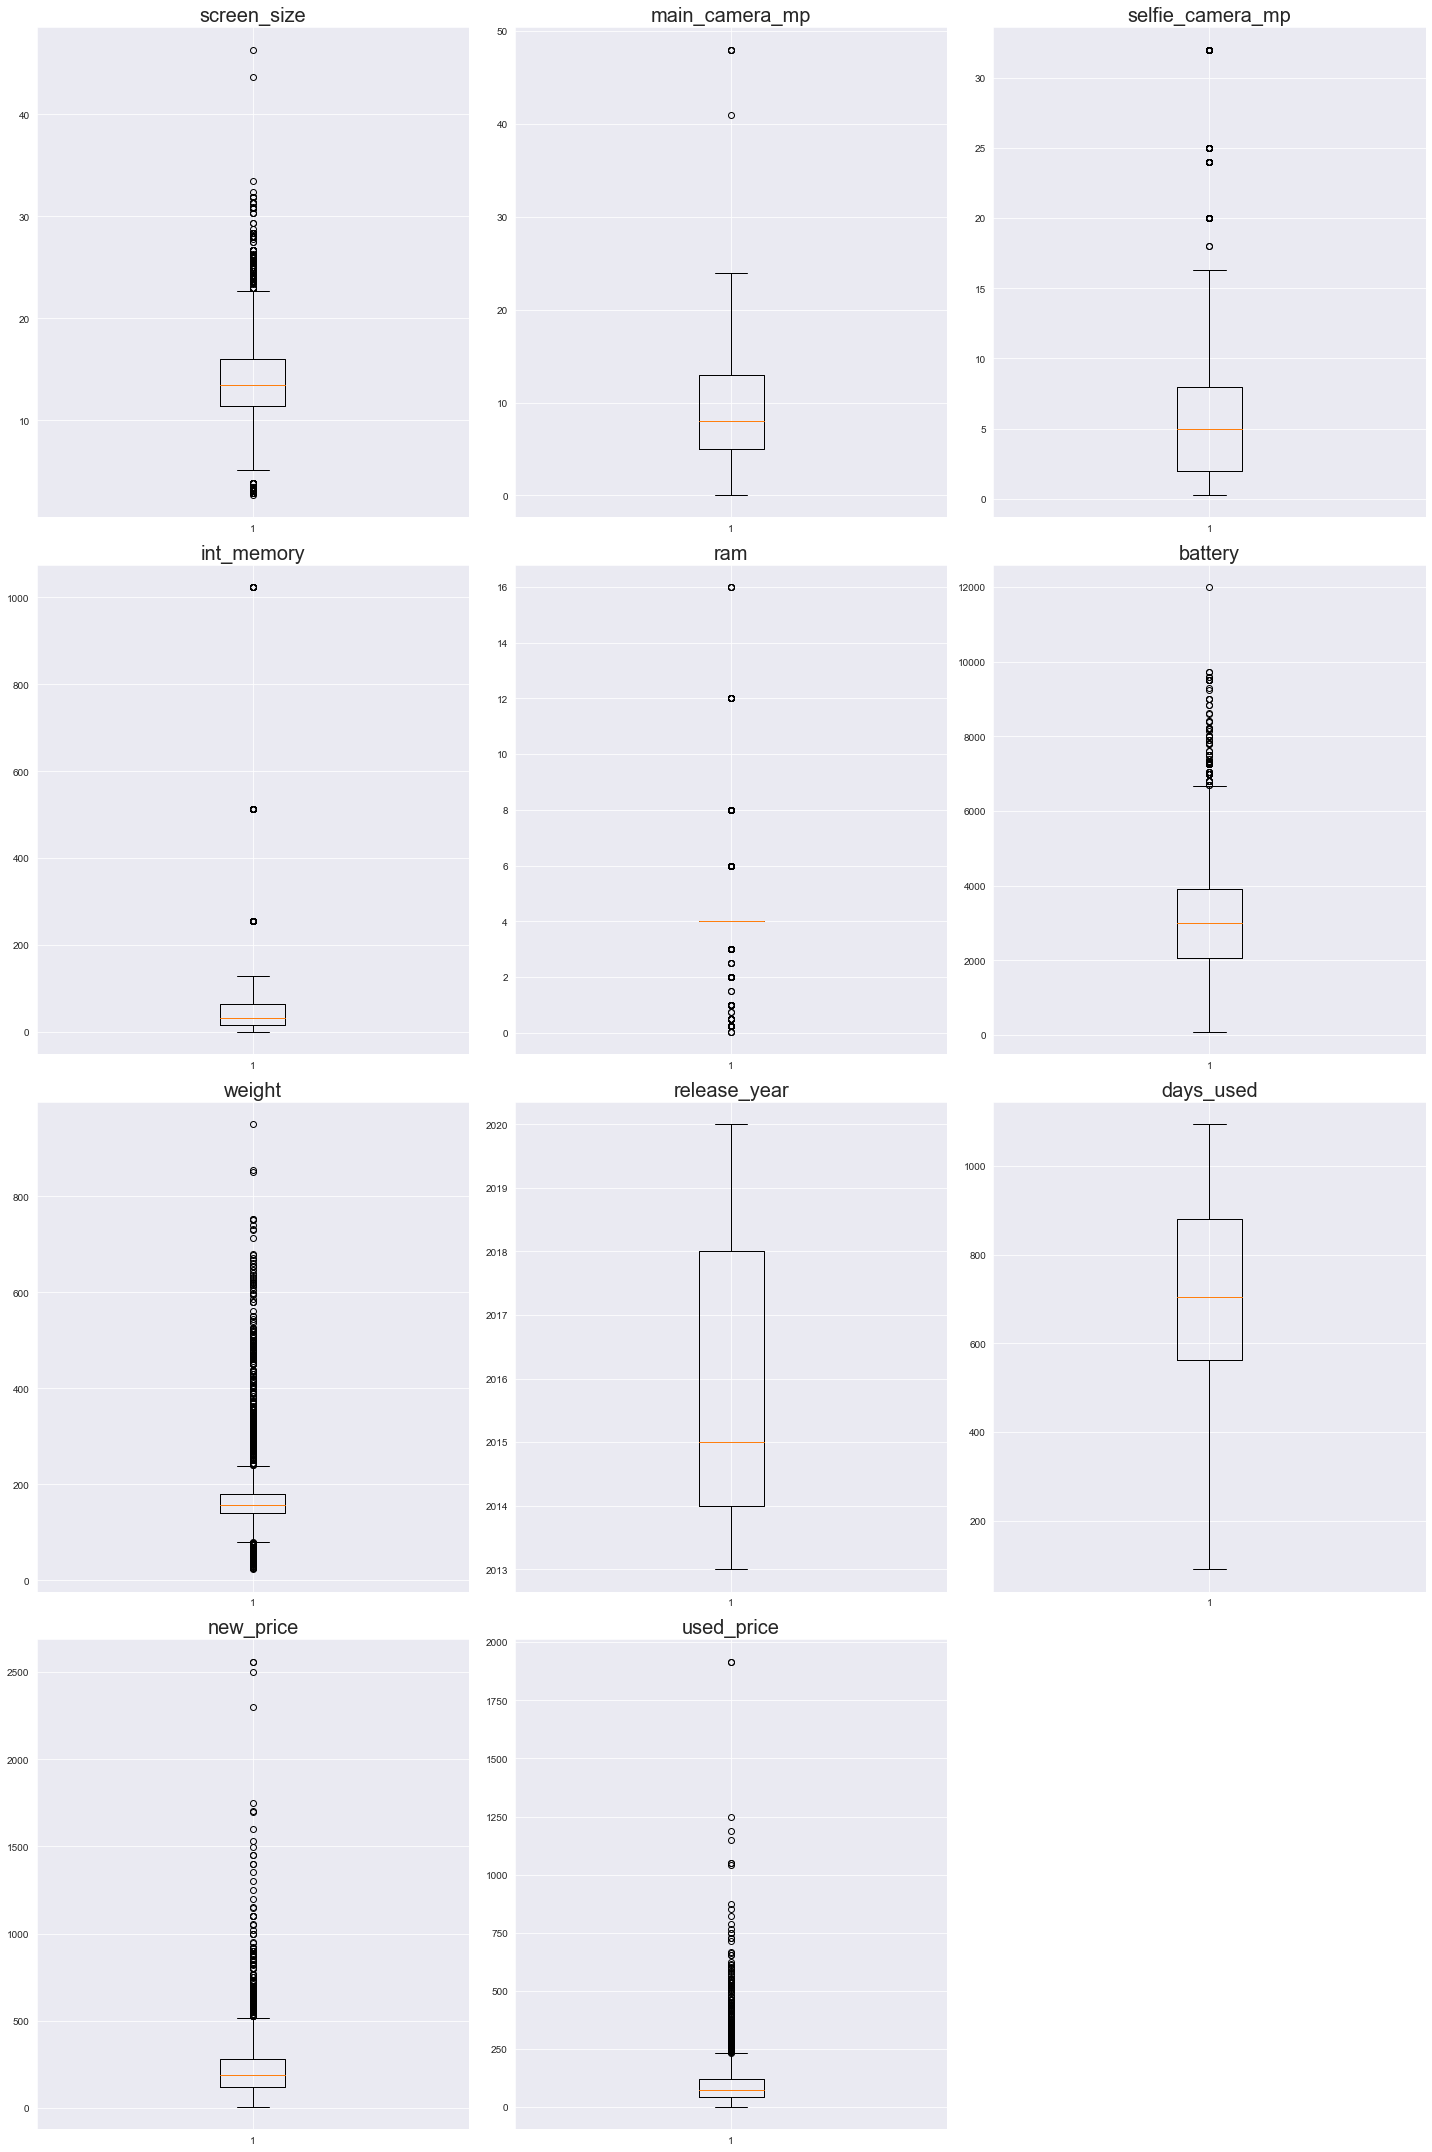

<IPython.core.display.Javascript object>

In [45]:
# create list of all numerical column names
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values
for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.savefig("boxplot_before.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

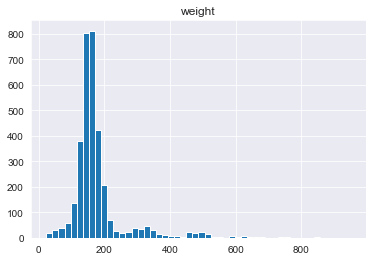

0


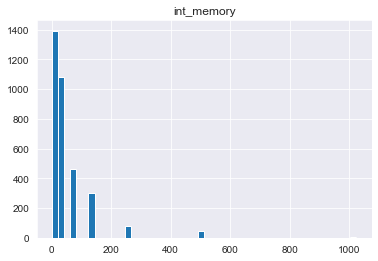

0


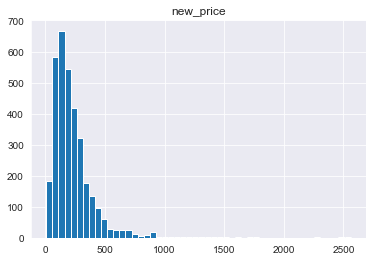

0


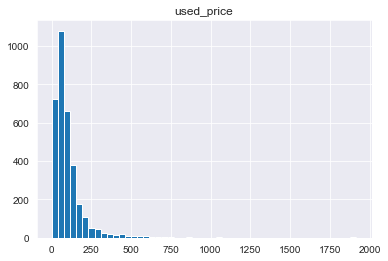

0


<IPython.core.display.Javascript object>

In [46]:
# list of all columns that may need log transformation
log_cols = [
    "weight",
    "int_memory",
    "new_price",
    "used_price",
]

# creates histplot of all columns that may need log tranformation
for colname in log_cols:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

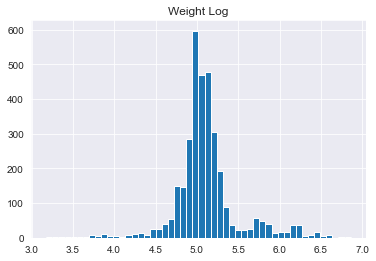

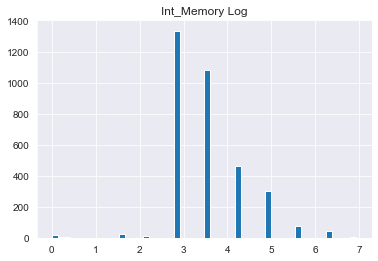

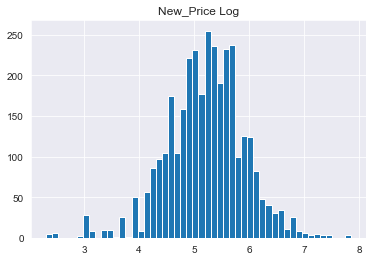

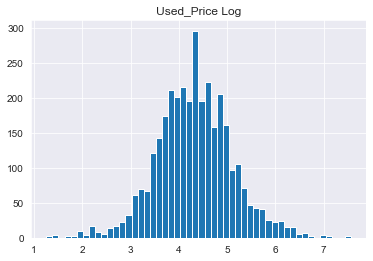

<IPython.core.display.Javascript object>

In [47]:
# creates histplot of all columns that may need log tranformation after they have received log transformation
for colname in log_cols:
    plt.hist(np.log(df[colname] + 1), 50)
    plt.title((colname + " log").title())
    plt.show()

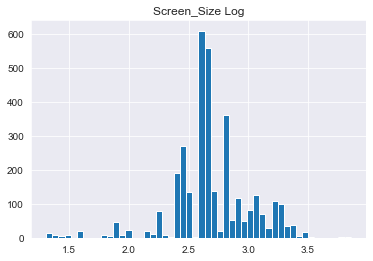

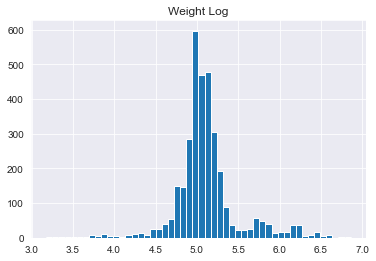

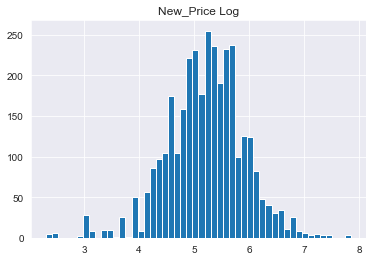

<IPython.core.display.Javascript object>

In [48]:
cols_to_log = [
    "screen_size",
    "weight",
    "new_price",
]

for colname in cols_to_log:
    df[colname] = np.log(df[colname] + 1)

for colname in cols_to_log:
    plt.hist(df[colname], 50)
    plt.title((colname + " log").title())
    plt.show()

### Observation:
+ I do not think these columns need log transformation due to the the graphs having any values less than 0 and the distribution is not right skewed enough to determine log is needed.

## Outliers

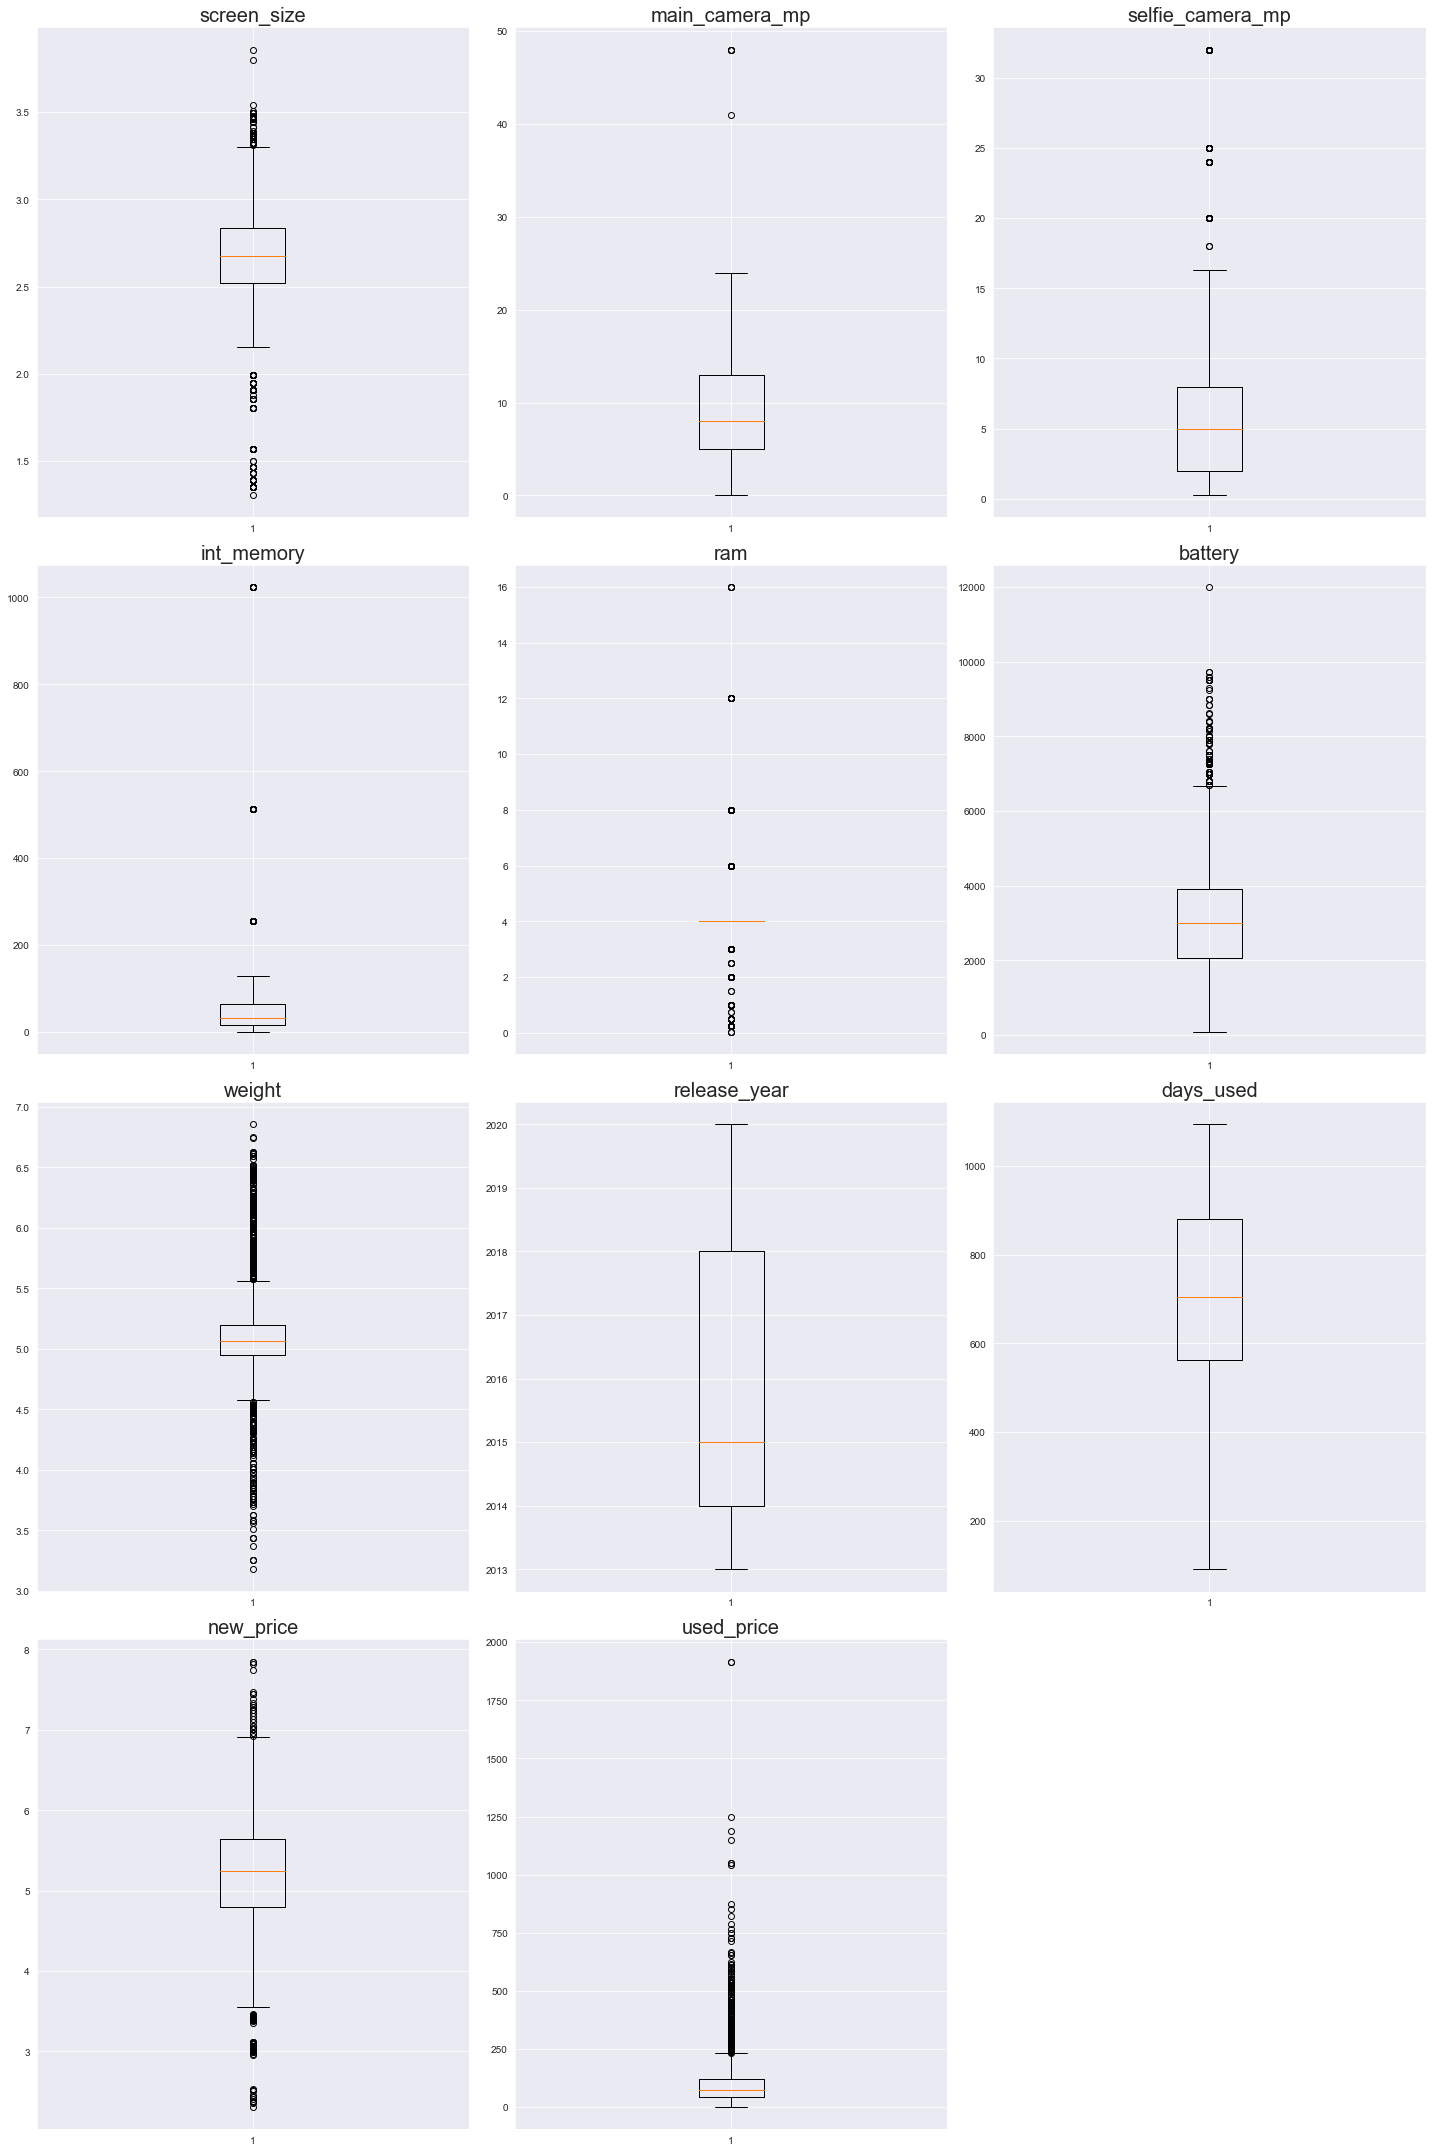

<IPython.core.display.Javascript object>

In [49]:
# create list of all numerical column names
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values
for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.savefig(
    "boxplot_after_log_transform.jpg", bbox_inches="tight"
)  # saves plot as JPEG
plt.show()  # create list of all numerical column names

In [50]:
df.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,3.217675,yes,no,13.0,5.0,64.0,3.0,3020.0,4.990433,2020,127,4.724019,86.96
1,Honor,Android,3.370738,yes,yes,13.0,16.0,128.0,8.0,4300.0,5.365976,2020,325,5.523020,161.49
2,Honor,Android,3.230409,yes,yes,13.0,8.0,128.0,8.0,4200.0,5.365976,2020,162,5.887409,268.55
3,Honor,Android,3.297317,yes,yes,13.0,8.0,64.0,6.0,7250.0,6.175867,2020,345,5.634540,180.23
4,Honor,Android,2.816606,yes,no,13.0,8.0,64.0,3.0,5000.0,5.225747,2020,293,4.954911,103.80
5,Honor,Android,3.110399,yes,no,13.0,8.0,64.0,4.0,4000.0,5.176150,2020,223,5.067016,113.67
6,Honor,Android,3.036874,yes,no,8.0,5.0,32.0,2.0,3020.0,4.976734,2020,234,4.529800,72.29
7,Honor,Android,2.973998,yes,no,13.0,8.0,64.0,4.0,3400.0,5.105945,2020,219,5.194289,132.91
8,Honor,Android,2.816606,yes,no,13.0,16.0,128.0,6.0,4000.0,5.111988,2020,161,5.304896,150.88
9,Honor,Android,3.110399,yes,no,13.0,8.0,128.0,6.0,4000.0,5.176150,2020,327,5.079850,103.59


<IPython.core.display.Javascript object>

In [51]:
df.ram.value_counts()  # value count of all ram

4.00     2858
6.00      109
0.25      103
8.00       90
2.00       70
3.00       65
1.00       37
0.50       11
12.00      10
2.50        4
16.00       4
0.03        3
1.50        2
0.75        2
Name: ram, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
# percentage of ram data that is 4GB
df.ram.value_counts()[4] / df.shape[0]

0.8485748218527316

<IPython.core.display.Javascript object>

### Observation:
+ release_year and days_used are the only columns that do not have outliers.
+ ram has 82% of it's data as 4GB, thus the outliers must be kept, ot else we will have skewed data.
+ the rest of the columns have outliers that are causing the data to shift and could cause the model to become unreliable.

In [53]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    #   use treat_outliers on all columns in col_list in dataframe df
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

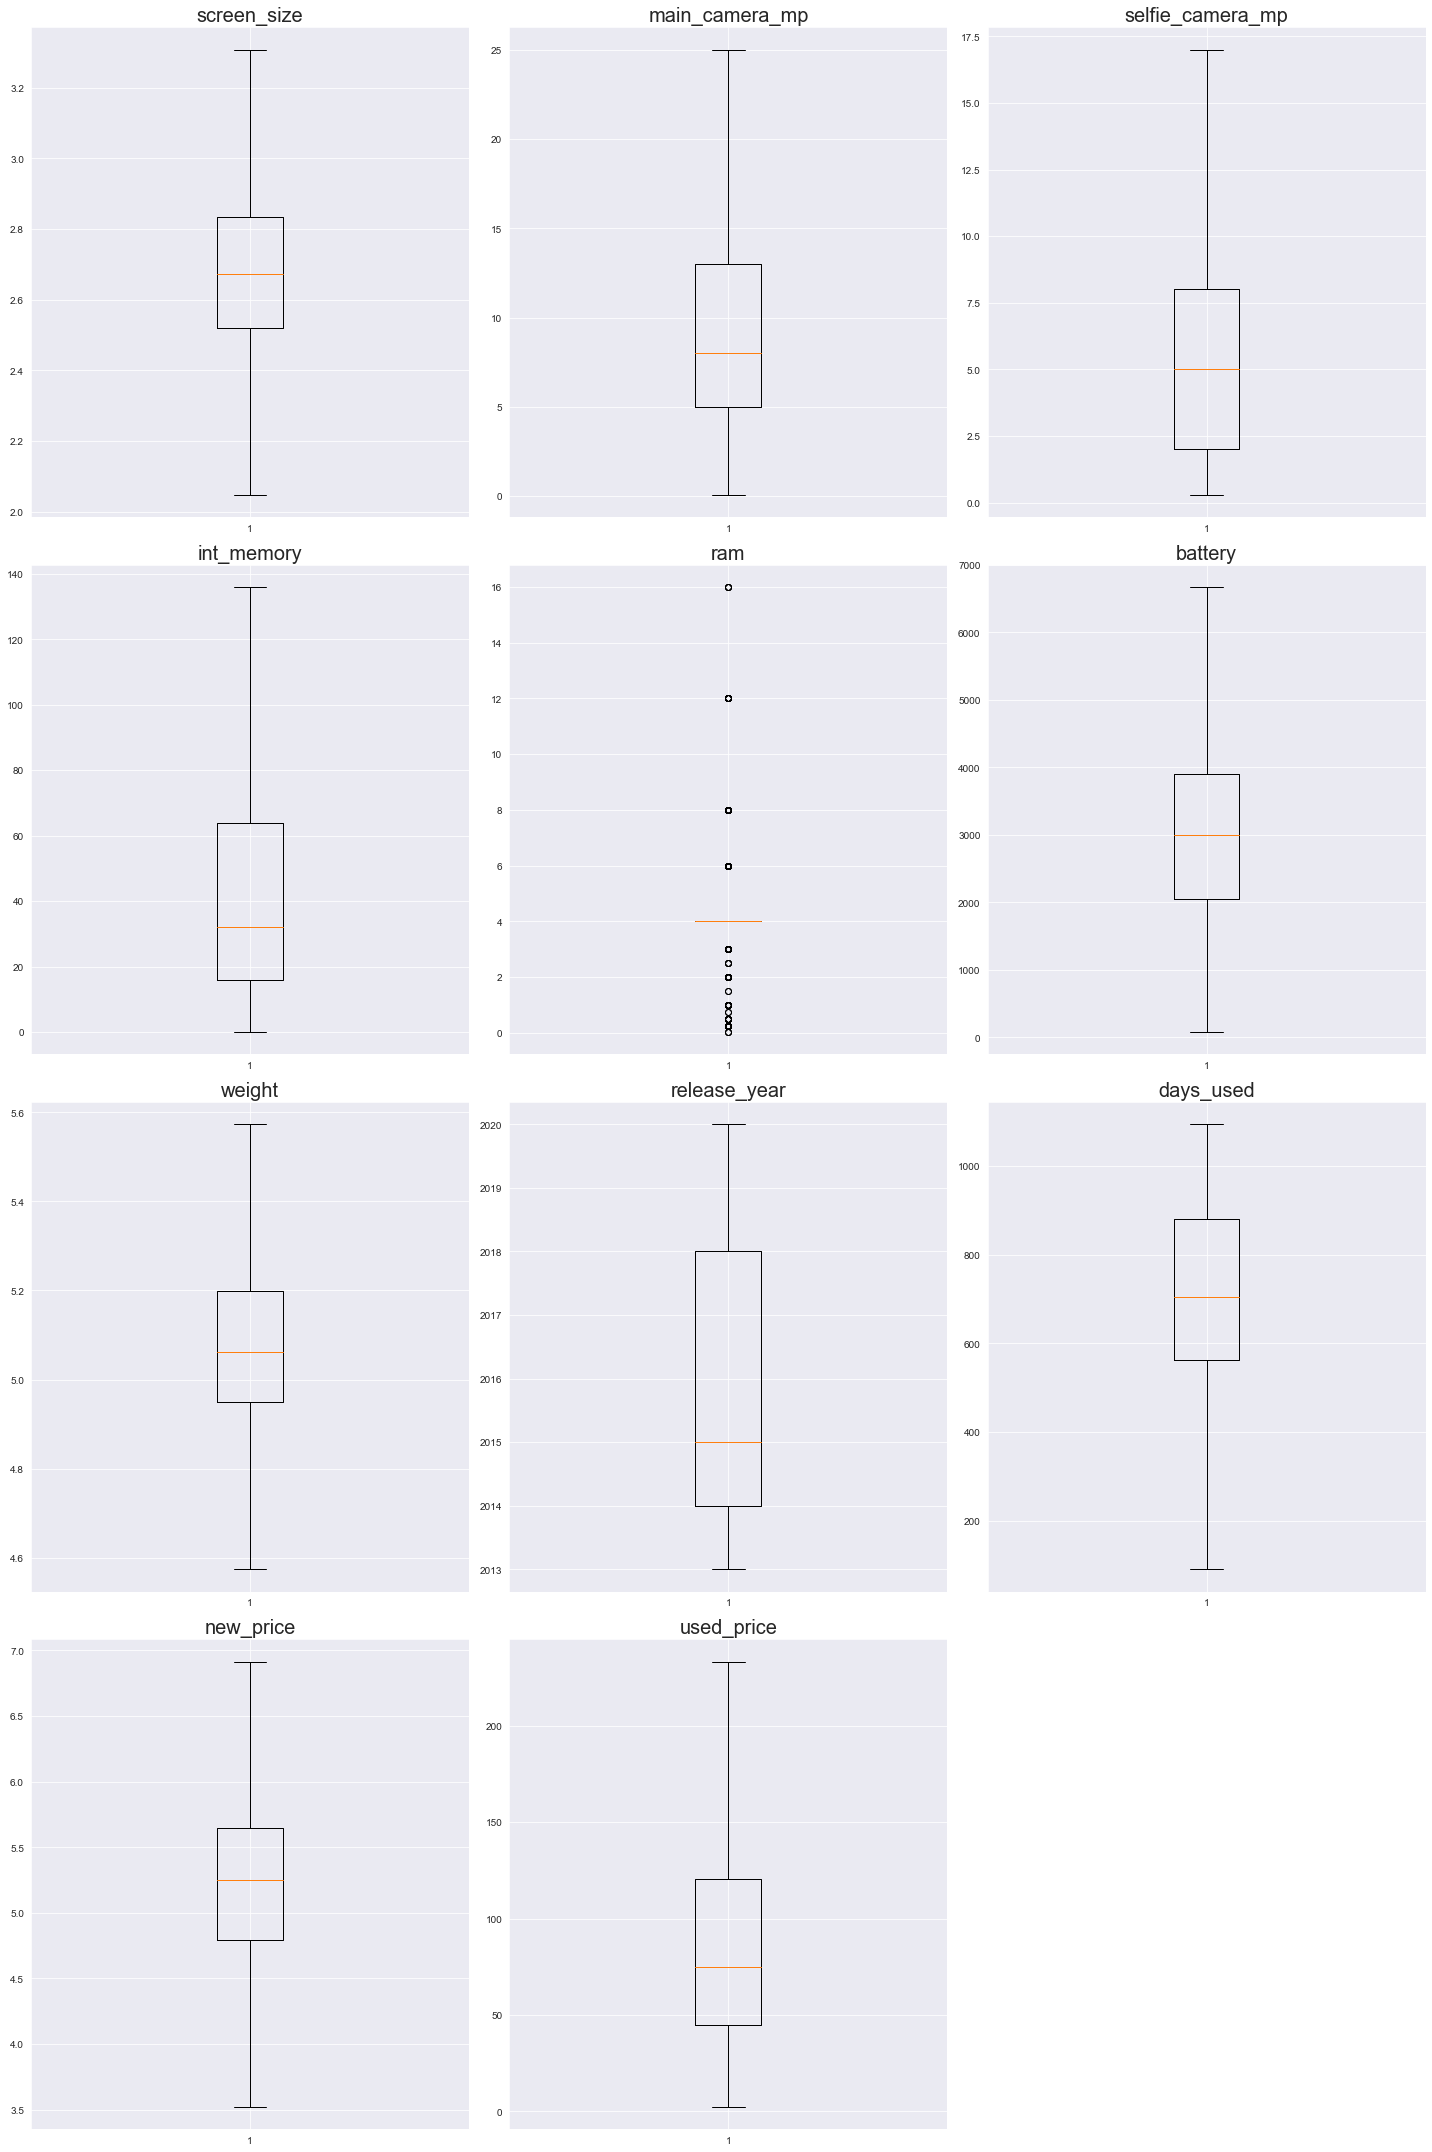

<IPython.core.display.Javascript object>

In [54]:
# create a list of all numerical values minus discrete values
numeric_cols_minus_discrete = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    #     "ram",
    "battery",
    "weight",
    "new_price",
    "used_price",
]
df = treat_outliers_all(
    df, numeric_cols_minus_discrete
)  # set outliers to level of whiskers for all numeric columns except for ram

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values
for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.savefig("boxplot_after_outliers.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

## One-hot encoding

In [55]:
df = pd.get_dummies(
    df, columns=["brand_name", "os", "4g", "5g"], drop_first=True
)  # create dummy columns for all categorical columns
df

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,3.217675,13.0,5.0,64.0,3.0,3020.0,4.990433,2020,127,4.724019,...,0,0,0,0,0,0,0,0,1,0
1,3.307272,13.0,16.0,128.0,8.0,4300.0,5.365976,2020,325,5.523020,...,0,0,0,0,0,0,0,0,1,1
2,3.230409,13.0,8.0,128.0,8.0,4200.0,5.365976,2020,162,5.887409,...,0,0,0,0,0,0,0,0,1,1
3,3.297317,13.0,8.0,64.0,6.0,6675.0,5.573103,2020,345,5.634540,...,0,0,0,0,0,0,0,0,1,1
4,2.816606,13.0,8.0,64.0,3.0,5000.0,5.225747,2020,293,4.954911,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,2.797281,8.0,7.0,64.0,4.0,3110.0,5.273000,2019,208,6.289793,...,0,0,0,0,0,0,0,1,1,0
3567,2.787477,13.0,8.0,128.0,8.0,4000.0,5.303305,2018,541,6.253472,...,0,0,0,0,0,0,0,0,1,0
3568,2.982140,13.0,5.0,32.0,3.0,4000.0,5.111988,2020,201,4.539564,...,0,0,0,0,0,0,0,0,1,0
3569,2.982140,13.0,5.0,32.0,2.0,4000.0,5.081404,2020,149,4.633903,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [56]:
print("The dataframe has", df.shape[1], "columns")  # prints new number of columns

The dataframe has 48 columns


<IPython.core.display.Javascript object>

### Observation:
+ using one-hot encoding the dataframe is extended to be able to include brand names, os, 4g status, and 5g status into the model.

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Observation:
+ using one-hot encoding the dataframe is extended to be able to include brand names, os, 4g status, and 5g status into the model.

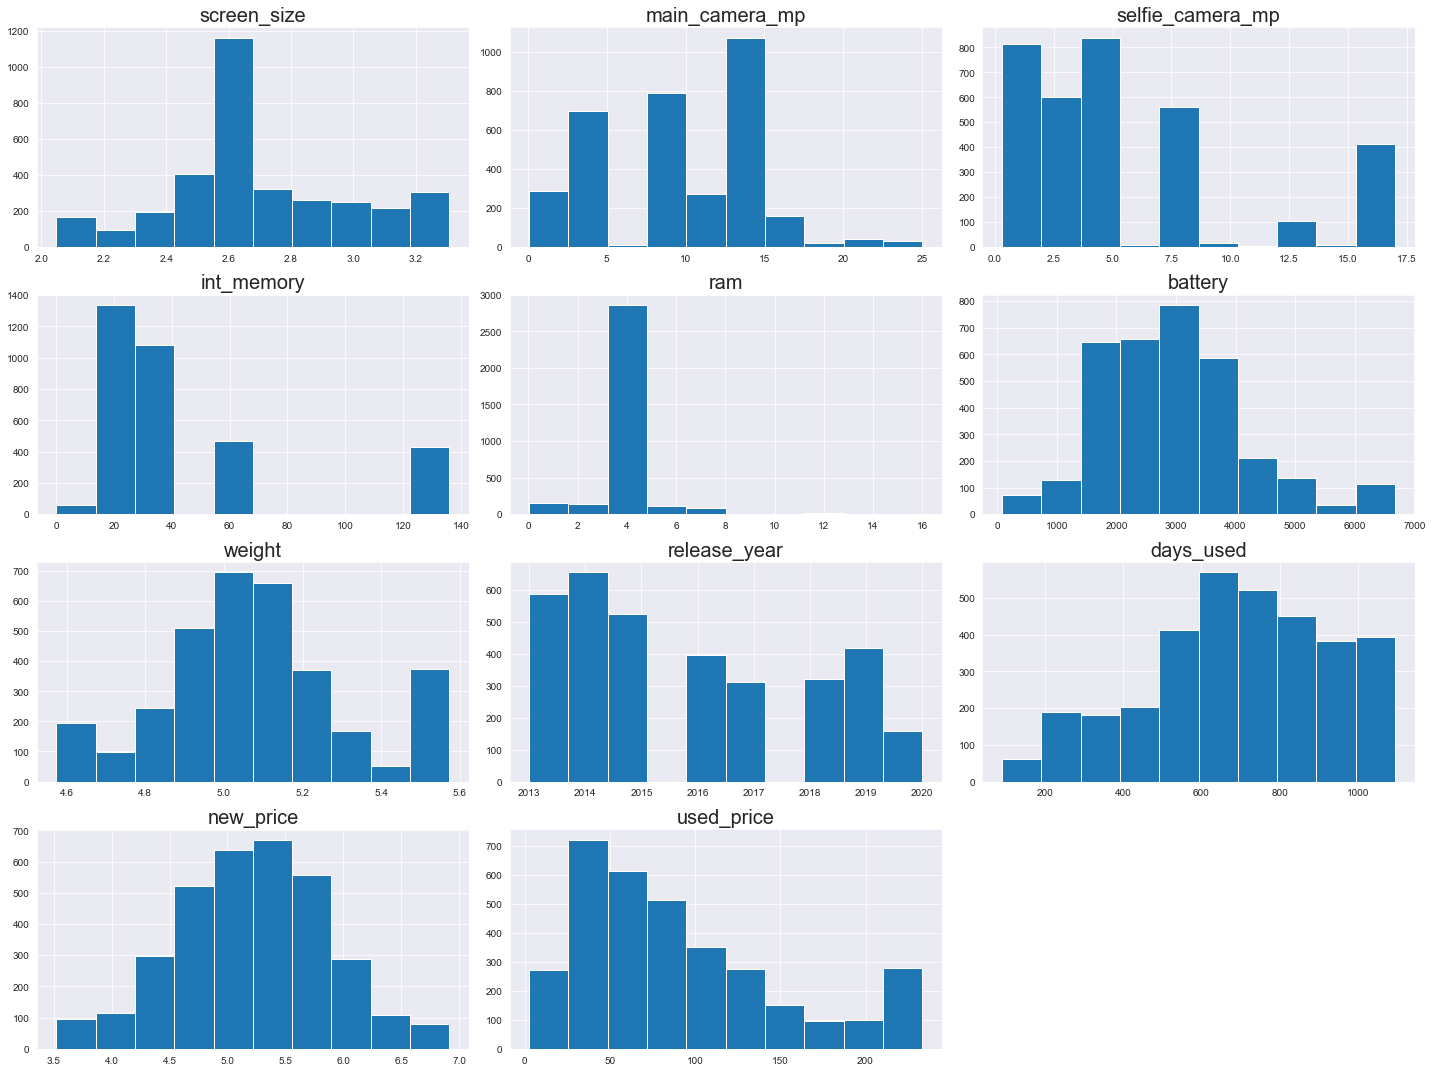

<IPython.core.display.Javascript object>

In [57]:
# creates new list with all numerical columns that are not dummy columns
num_cols_list = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "release_year",
    "days_used",
    "new_price",
    "used_price",
]

plt.figure(figsize=(20, 15))

# create subplot of all histplots of all numerical columns that are not dummy columns
for i, dist in enumerate(df[num_cols_list]):
    plt.subplot(4, 3, i + 1)
    plt.hist(df[dist])
    plt.tight_layout()
    plt.title(dist, fontsize=20)

plt.show()

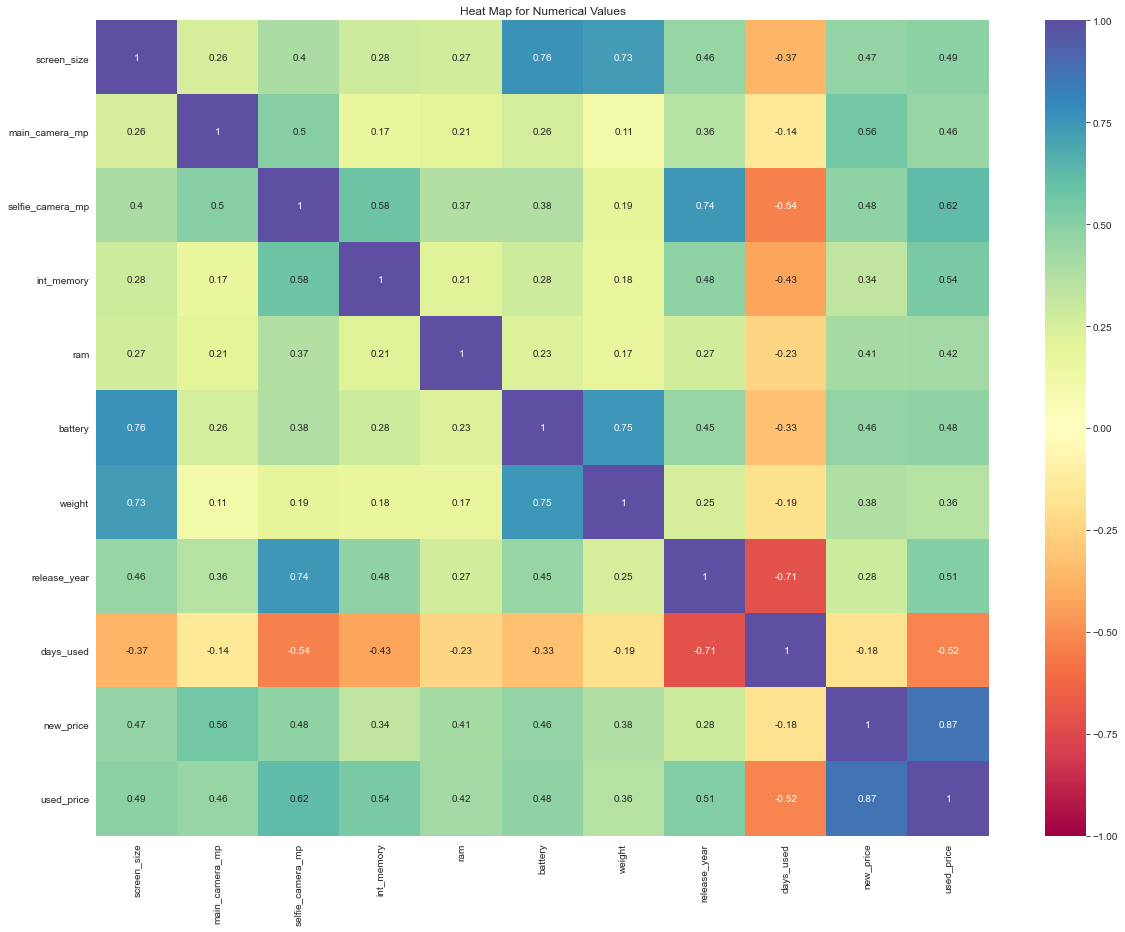

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    df[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral"
)  # create heatmap of correlation of all numerical columns that are not dummy columns
plt.title("Heat Map for Numerical Values")  # set title for heatmap plot
plt.show()

### Observation:
+ The correlation values are relativily the same, just a little bit more exaggerated

## Building a Linear Regression model

In [59]:
X = df.drop(
    "used_price", axis=1
)  # sets X for train_split as df without used_price column
y = df["used_price"]  # sets y as df with just the used_price column in it
print(y.head())  # prints the first 5 rows of y
X.head()  # prints the first 5 rows of X

0     86.96000
1    161.49000
2    233.22875
3    180.23000
4    103.80000
Name: used_price, dtype: float64


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,3.217675,13.0,5.0,64.0,3.0,3020.0,4.990433,2020,127,4.724019,...,0,0,0,0,0,0,0,0,1,0
1,3.307272,13.0,16.0,128.0,8.0,4300.0,5.365976,2020,325,5.523020,...,0,0,0,0,0,0,0,0,1,1
2,3.230409,13.0,8.0,128.0,8.0,4200.0,5.365976,2020,162,5.887409,...,0,0,0,0,0,0,0,0,1,1
3,3.297317,13.0,8.0,64.0,6.0,6675.0,5.573103,2020,345,5.634540,...,0,0,0,0,0,0,0,0,1,1
4,2.816606,13.0,8.0,64.0,3.0,5000.0,5.225747,2020,293,4.954911,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [60]:
# set train and test data sets for linear regression model as 70-30 split with same random state 11 for consistency
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=11
)

linearregression = (
    LinearRegression()
)  # sets empty linear regression model as linearregression
linearregression.fit(
    x_train, y_train
)  # fits the linearregression model with the training data

LinearRegression()

<IPython.core.display.Javascript object>

In [61]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()

<IPython.core.display.Javascript object>

## Model performance evaluation

In [62]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [63]:
# checking model performance on train set (seen 70% data)
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,17.130396,12.865223,0.92133,0.919729,27.052175


<IPython.core.display.Javascript object>

In [64]:
olsmod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             used_price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     575.3
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:20:57   Log-Likelihood:                -10040.
No. Observations:                2357   AIC:                         2.018e+04
Df Residuals:                    2309   BIC:                         2.045e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -734.1126    709.027     -1.035      0.301   -2124.509     656.283
screen_size              -7.9552      2.294     -3.468      0.001     -12.454      -3.457
main_camera_mp           -0.5937      0.120     -4.938      0.000      -0.830      -0.358
selfie_camera_mp          0.3530      0.139      2.542      0.011       0.081       0.625
int_memory                0.1989      0.013     15.132      0.000       0.173       0.225
ram                       0.9456      0.393      2.406      0.016       0.175       1.717
battery                   0.0008      0.001      1.417      0.157      -0.000       0.002
weight                    1.3698      2.537      0.540      0.589      -3.606       6.345
release_year              0.2481      0.351      0.706      0.480      -0.441       0.937
days_used                -0.0849      0.002    -37.321      0.000      -0.089      -0.080
new_price                73.6642      0.961     76.668      0.000      71.780      75.548
brand_name_Alcatel        4.4237      3.431      1.290      0.197      -2.304      11.151
brand_name_Apple        -30.8402     17.812     -1.731      0.084     -65.769       4.088
brand_name_Asus           1.5253      3.443      0.443      0.658      -5.227       8.278
brand_name_BlackBerry    -5.5915      5.268     -1.061      0.289     -15.922       4.739
brand_name_Celkon        13.7155      4.640      2.956      0.003       4.617      22.814
brand_name_Coolpad        2.9394      5.805      0.506      0.613      -8.444      14.322
brand_name_Gionee        -0.2300      3.996     -0.058      0.954      -8.067       7.607
brand_name_Google        27.5894      6.253      4.412      0.000      15.327      39.852
brand_name_HTC           -0.5137      3.483     -0.147      0.883      -7.344       6.317
brand_name_Honor          1.9376      3.481      0.557      0.578      -4.889       8.764
brand_name_Huawei         2.5365      3.159      0.803      0.422      -3.659       8.732
brand_name_Karbonn        7.5517      4.866      1.552      0.121      -1.991      17.095
brand_name_LG             0.0424      3.245      0.013      0.990      -6.321       6.406
brand_name_Lava           7.9012      4.384      1.802      0.072      -0.696      16.498
brand_name_Lenovo        -0.7015      3.289     -0.213      0.831      -7.152       5.749
brand_name_Meizu          2.6394      4.366      0.605      0.546      -5.922      11.201
brand_name_Micromax      10.0597      3.447      2.918      0.004       3.300      16.820
brand_name_Microsoft      5.5843      6.081      0.918      0.359      -6.341      17.510
brand_name_Motorola      -0.3589      3.635     -0.099      0.921      -7.488       6.770
brand_name_Nokia          2.6999      3.655      0.739      0.460      -4.467       9.867
brand_name_OnePlus     

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

In [65]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [66]:
checking_vif(x_train1)

,feature,VIF
0,const,3.955619e+06
1,screen_size,3.490938e+00
2,main_camera_mp,2.424152e+00
3,selfie_camera_mp,3.862719e+00
4,int_memory,1.937728e+00
5,ram,1.762167e+00
6,battery,3.668461e+00
7,weight,3.085492e+00
8,release_year,4.715548e+00
9,days_used,2.304373e+00


<IPython.core.display.Javascript object>

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [67]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [68]:
col_list = [
    "brand_name_Apple",
    "brand_name_Others",
    "os_IOS",
    "brand_name_Samsung",
    "brand_name_LG",
    "brand_name_Huawei",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_LG,0.919763,17.303790
1,brand_name_Huawei,0.919741,17.306204
2,os_IOS,0.919729,17.307536
3,brand_name_Samsung,0.919725,17.307891
4,brand_name_Others,0.919716,17.308865
5,brand_name_Apple,0.919659,17.315019


<IPython.core.display.Javascript object>

* Dropping *brand_name_Apple* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop *brand_name_Apple* and check the VIF again.

In [69]:
col_to_drop = "brand_name_Apple"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping brand_name_Apple


,feature,VIF
0,const,3.946366e+06
1,screen_size,3.487102e+00
2,main_camera_mp,2.423704e+00
3,selfie_camera_mp,3.841114e+00
4,int_memory,1.935142e+00
5,ram,1.758341e+00
6,battery,3.668397e+00
7,weight,3.085428e+00
8,release_year,4.704566e+00
9,days_used,2.304319e+00


<IPython.core.display.Javascript object>

* Dropping *brand_name_Apple* has brought the VIF of *os_iOS* below 5.
* *brand_name_Others*, *brand_name_Samsung*, *brand_name_LG*, *brand_name_Huawei* still have a VIF score greater than 5.

In [70]:
res = treating_multicollinearity(
    x_train1,
    y_train,
    ["brand_name_Others", "brand_name_Samsung", "brand_name_LG", "brand_name_Huawei"],
)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_LG,0.919763,17.303790
1,brand_name_Huawei,0.919741,17.306204
2,brand_name_Samsung,0.919725,17.307891
3,brand_name_Others,0.919716,17.308865


<IPython.core.display.Javascript object>

- We will drop *brand_name_Others*.

In [71]:
col_to_drop = "brand_name_Others"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping brand_name_Others


,feature,VIF
0,const,3.944631e+06
1,screen_size,3.480070e+00
2,main_camera_mp,2.423507e+00
3,selfie_camera_mp,3.840767e+00
4,int_memory,1.934361e+00
5,ram,1.757108e+00
6,battery,3.668307e+00
7,weight,3.085219e+00
8,release_year,4.701586e+00
9,days_used,2.304299e+00


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**

In [72]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     600.0
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:20:59   Log-Likelihood:                -10043.
No. Observations:                2357   AIC:                         2.018e+04
Df Residuals:                    2311   BIC:                         2.044e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -696.20

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared has not changed, which shows that the dropped columns did not have an effect on the model.

- *screen_size*, *ram*, *battery*, *weight*, *release_year*, *brand_name_Alcatel*, *brand_name_Asus*, *brand_name_Celkon*, *brand_name_Coolpad* , *brand_name_HTC*, *brand_name_Huawei*, *brand_name_Karbonn*, *brand_name_LG*, *brand_name_Lava*, *brand_name_Meizu*, *brand_name_Micromax*, *brand_name_Microsoft*, *brand_name_Motorola*, *brand_name_Oppo*, *brand_name_Panasonic*, *brand_name_Realme*, *brand_name_Samsung*, *brand_name_Sony*, *brand_name_Spice*, *brand_name_Vivo*, *brand_name_XOLO*, *brand_name_XOLO*, *brand_name_Xiaomi*, *brand_name_ZTE*, *os_Windows*, and *5g_yes* have p-value > 0.05. So, they are not significant and we'll drop them.

- Will drop columns one at a time.

In [73]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    print(max_p_value, "----------", feature_with_p_max)

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

0.9690056606980301 ---------- brand_name_Coolpad
0.9104617729638921 ---------- brand_name_Nokia
0.9006864363197511 ---------- brand_name_Meizu
0.9040455737917603 ---------- brand_name_XOLO
0.821492247623477 ---------- brand_name_Samsung
0.7162991752278338 ---------- brand_name_Huawei
0.7361432815385343 ---------- brand_name_Oppo
0.6593973626309066 ---------- brand_name_Panasonic
0.664035191164233 ---------- brand_name_Sony
0.631779815135771 ---------- 5g_yes
0.6363016672240621 ---------- brand_name_Honor
0.5893356928717755 ---------- brand_name_Microsoft
0.5317821841984316 ---------- weight
0.4942868772695156 ---------- brand_name_OnePlus
0.4817528097036029 ---------- brand_name_Asus
0.44819679150889624 ---------- release_year
0.43485689249560544 ---------- brand_name_Alcatel
0.37489200096646447 ---------- os_Windows
0.3440843929045604 ---------- brand_name_Xiaomi
0.28368235580228607 ---------- brand_name_Karbonn
0.23938530332131716 ---------- brand_name_Gionee
0.21246410271578345 ----

<IPython.core.display.Javascript object>

In [74]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [75]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1797.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:20:59   Log-Likelihood:                -10059.
No. Observations:                2357   AIC:                         2.015e+04
Df Residuals:                    2341   BIC:                         2.024e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -229.3192    

<IPython.core.display.Javascript object>

+ There is an adjusted R-squared value of 0.985. Meaning the model can explain 98.5% of the variance

### TEST FOR LINEARITY AND INDEPENDENCE

In [76]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1189,42.14,34.690073,7.449927
2892,53.85,76.914138,-23.064138
1941,55.68,75.306778,-19.626778
919,84.08,96.021179,-11.941179
981,69.98,112.020696,-42.040696


<IPython.core.display.Javascript object>

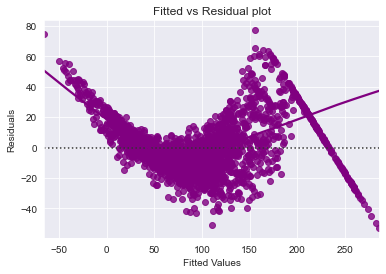

<IPython.core.display.Javascript object>

In [77]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.savefig(
    "test_for_linearity_adn_independence.jpg", bbox_inches="tight"
)  # saves plot as JPEG
plt.show()

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

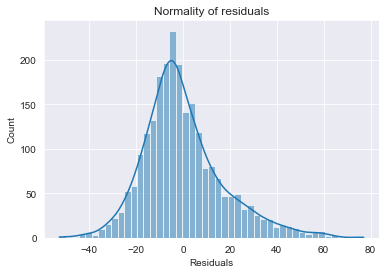

<IPython.core.display.Javascript object>

In [78]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.savefig("test_for_normality.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

+ the histogram is normally distributed.

### TEST FOR HOMOSCEDASTICITY

In [79]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.0219865540587907), ('p-value', 0.35543598444900565)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model Summary

In [80]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
791,100.36000,106.597205
2923,138.31000,135.351116
2592,102.40000,117.027883
643,63.64000,75.131161
1896,51.19000,52.489818
1908,19.81000,5.197670
401,233.22875,283.079428
592,233.22875,166.445415
1779,48.16000,57.958707
513,80.11000,87.533792


<IPython.core.display.Javascript object>

- The model has returned pretty good prediction results, and the actual and predicted values are comparable.

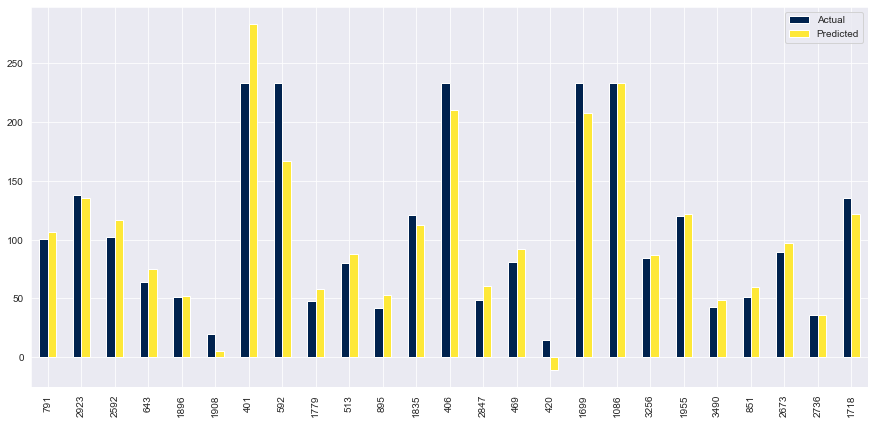

<IPython.core.display.Javascript object>

In [81]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7), colormap="cividis")
plt.savefig("actual_vs_predicted.jpg", bbox_inches="tight")  # saves plot as JPEG
plt.show()

In [82]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
dfi.export(olsmod2_train_perf, "training_performance.jpg")  # saves dataframe as image
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,17.263757,12.980995,0.9201,0.919554,27.357184


<IPython.core.display.Javascript object>

In [83]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
dfi.export(olsmod2_test_perf, "testing_performance.jpg")  # saves dataframe as image
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,17.956274,13.430664,0.913957,0.912572,28.519961


<IPython.core.display.Javascript object>

* The model is able to explain ~91% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 28% of the used price. 

* It can be concluded that the model *olsmod2* is good for prediction as well as inference purposes.

In [84]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1797.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:21:04   Log-Likelihood:                -10059.
No. Observations:                2357   AIC:                         2.015e+04
Df Residuals:                    2341   BIC:                         2.024e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -229.3192    

<IPython.core.display.Javascript object>

In [85]:
x_train4.new_price.value_counts()

3.522805    49
6.915339    17
5.302957     4
5.541852     4
5.146680     3
            ..
5.803024     1
5.773277     1
5.635932     1
5.780717     1
5.480180     1
Name: new_price, Length: 2054, dtype: int64

<IPython.core.display.Javascript object>

In [86]:
y_train.value_counts()

233.22875    169
59.78000       6
60.10000       5
120.04000      4
36.25000       4
            ... 
63.18000       1
115.32000      1
27.04000       1
88.08000       1
103.80000      1
Name: used_price, Length: 1912, dtype: int64

<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

## Conclusions

1. New price has the most significance to the used price. As this increases, the used price increases the most with respect to the other values. Brand name and operating system have the second most effect on the used price of the phone. This makes sense, since the more expensive brands like apple use their own operating system. The better the phone the higher the price.

2. Screen size has a negative relationship on used price. for every cm larger screen the used price is decreased by €5.13. This means that the cheaper the phone the larger the screen will be.

3. The brand Realme is the most negatively related to the used price. Meaning that brand sells the cheapest phones.

4. Andriods make up 90% of the used phones.

5. The more expensive the phone the higher the ram.

6. The brand Others has the largest amount of large screen phones (almost 15%). Meaning most of the phones with large screens are off brands. Samsung comes in second with about 10.5% of the used phones with large screens.

7. 16.18% of phones have a selfie camera greater than 8 MP.